<a href="https://colab.research.google.com/github/aulphin/Rise-main/blob/main/RISE_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the libraries

In [ ]:
import os                                       #// control processes upto a limit
import numpy as np                              # math. opn on array
from matplotlib import pyplot as plt            # graph plotting library and data visualization
from skimage.transform import resize           #sci-kit python package for image processing
from tqdm import tqdm                          # allow for the generation of progress bars in python


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications.resnet import ResNet50, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow.keras import backend as K

Define your model here

In [ ]:
class Model():
    def __init__(self):
        K.set_learning_phase(0)
        self.model = ResNet50()
        self.input_size = (224, 224)

    def run_on_batch(self, x):
        return self.model.predict(x)

Load and Pre-process image

In [ ]:
from keras.preprocessing import image

In [ ]:
def load_img(path):
    img = image.load_img(path, target_size=model.input_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return img, x

RISE

In [ ]:
def generate_masks(N, s, p1):                                         # N is for no of mask to generate, s is size of grid(sxs),p1 is prob. of each grid cell getting selected
    cell_size = np.ceil(np.array(model.input_size) / s)               # calculate the cell_size
    up_size = (s + 1) * cell_size

    grid = np.random.rand(N, s, s) < p1
    grid = grid.astype('float32')

    masks = np.empty((N, *model.input_size))

    for i in tqdm(range(N), desc='Generating masks'):               # By using tqdm in this code, the progress bar allows you to track the progress of the loop iteration as masks are being generated.
        # Random shifts
        x = np.random.randint(0, cell_size[0])
        y = np.random.randint(0, cell_size[1])
        # Linear upsampling and cropping
        masks[i, :, :] = resize(grid[i], up_size, order=1, mode='reflect',
                                anti_aliasing=False)[x:x + model.input_size[0], y:y + model.input_size[1]]
    masks = masks.reshape(-1, *model.input_size, 1)
    return masks

In [ ]:
batch_size = 100

def explain(model, inp, masks):
    preds = []
    # Make sure multiplication is being done for correct axes
    masked = inp * masks
    for i in tqdm(range(0, N, batch_size), desc='Explaining'):
        preds.append(model.run_on_batch(masked[i:min(i+batch_size, N)]))
    preds = np.concatenate(preds)
    sal = preds.T.dot(masks.reshape(N, -1)).reshape(-1, *model.input_size)
    sal = sal / N / p1
    return sal

Running explainations

In [ ]:
def class_name(idx):
    return decode_predictions(np.eye(1, 1000, idx))[0][0][1]

In [ ]:
model = Model()

/usr/local/lib/python3.10/dist-packages/keras/backend.py:452: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(


102967424/102967424 [==============================] - 1s 0us/step


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
image_path = '/content/drive/My Drive/cat.jpg'
img, x = load_img(image_path)

# New Section

In [ ]:
N = 2000
s = 8
p1 = 0.5
masks = generate_masks(2000, 8, 0.5)

Generating masks: 100%|██████████| 2000/2000 [00:08<00:00, 229.11it/s]


In [ ]:
sal = explain(model, x, masks)

Explaining:   0%|          | 0/20 [00:00<?, ?it/s]

4/4 [==============================] - 30s 7s/step


Explaining:   5%|▌         | 1/20 [00:43<13:40, 43.18s/it]

4/4 [==============================] - 20s 5s/step


Explaining:  10%|█         | 2/20 [01:03<08:58, 29.93s/it]

4/4 [==============================] - 25s 5s/step


Explaining:  15%|█▌        | 3/20 [01:28<07:50, 27.70s/it]

4/4 [==============================] - 21s 5s/step


Explaining:  20%|██        | 4/20 [01:49<06:38, 24.94s/it]

4/4 [==============================] - 20s 5s/step


Explaining:  25%|██▌       | 5/20 [02:10<05:50, 23.37s/it]

4/4 [==============================] - 21s 4s/step


Explaining:  30%|███       | 6/20 [02:51<06:51, 29.40s/it]

4/4 [==============================] - 21s 5s/step


Explaining:  35%|███▌      | 7/20 [03:32<07:11, 33.23s/it]

4/4 [==============================] - 21s 5s/step


Explaining:  40%|████      | 8/20 [03:53<05:51, 29.28s/it]

4/4 [==============================] - 20s 5s/step


Explaining:  45%|████▌     | 9/20 [04:13<04:52, 26.57s/it]

4/4 [==============================] - 21s 4s/step


Explaining:  50%|█████     | 10/20 [04:34<04:07, 24.78s/it]

4/4 [==============================] - 22s 5s/step


Explaining:  55%|█████▌    | 11/20 [05:15<04:28, 29.79s/it]

4/4 [==============================] - 20s 5s/step


Explaining:  60%|██████    | 12/20 [05:56<04:25, 33.23s/it]

4/4 [==============================] - 20s 5s/step


Explaining:  65%|██████▌   | 13/20 [06:17<03:25, 29.41s/it]

4/4 [==============================] - 20s 5s/step


Explaining:  70%|███████   | 14/20 [06:38<02:40, 26.73s/it]

4/4 [==============================] - 22s 5s/step


Explaining:  75%|███████▌  | 15/20 [07:00<02:06, 25.39s/it]

4/4 [==============================] - 21s 5s/step


Explaining:  80%|████████  | 16/20 [07:41<02:00, 30.14s/it]

4/4 [==============================] - 22s 4s/step


Explaining:  85%|████████▌ | 17/20 [08:22<01:40, 33.43s/it]

4/4 [==============================] - 20s 5s/step


Explaining:  90%|█████████ | 18/20 [08:43<00:59, 29.55s/it]

4/4 [==============================] - 20s 4s/step


Explaining:  95%|█████████▌| 19/20 [09:03<00:26, 26.74s/it]

4/4 [==============================] - 23s 5s/step


Explaining: 100%|██████████| 20/20 [09:44<00:00, 29.22s/it]


35363/35363 [==============================] - 0s 0us/step


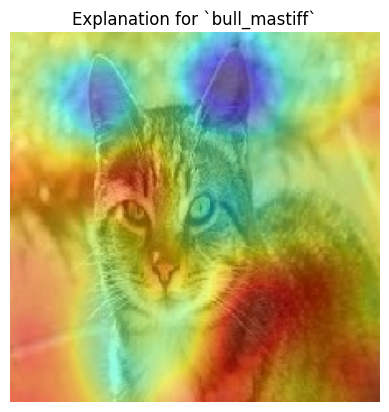

In [ ]:
class_idx = 243
plt.title('Explanation for `{}`'.format(class_name(class_idx)))
plt.axis('off')
plt.imshow(img)
plt.imshow(sal[class_idx], cmap='jet', alpha=0.5)
# plt.colorbar()
plt.show()

Verifying in other images

In [ ]:
image_path = '/content/drive/My Drive/dog.jpeg'
ima, x = load_img(image_path)

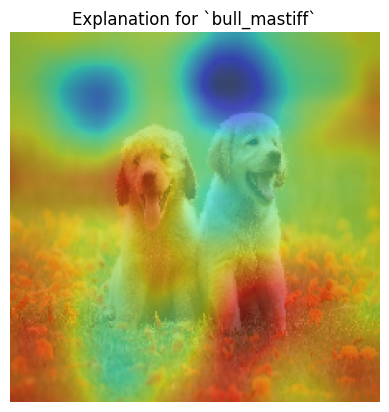

In [ ]:
class_idx = 243
plt.title('Explanation for `{}`'.format(class_name(class_idx)))
plt.axis('off')
plt.imshow(ima)
plt.imshow(sal[class_idx], cmap='jet', alpha=0.5)
# plt.colorbar()
plt.show()

In [ ]:
image_path = '/content/drive/My Drive/catdog.png'
imt, x = load_img(image_path)

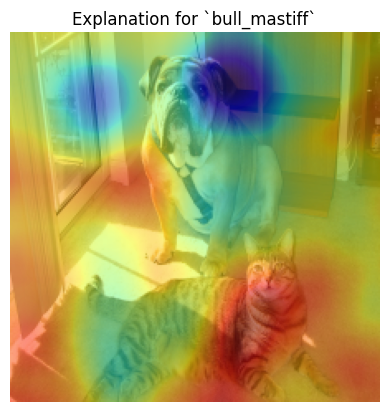

In [ ]:
class_idx = 243
plt.title('Explanation for `{}`'.format(class_name(class_idx)))
plt.axis('off')
plt.imshow(imt)
plt.imshow(sal[class_idx], cmap='jet', alpha=0.5)
# plt.colorbar()
plt.show()